In [24]:
# import geopandas as gpd
import pandas as pd
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# import matplotlib.pyplot as plt
# import matplotlib.lines as mlines
# import matplotlib.patches as mpatches

pd.options.display.max_columns = 99

In [46]:
frac = 0.02

In [85]:
cs_file = '/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_'+str(frac)+'_ARGCSactual.csv'
df = pd.read_csv(cs_file, usecols = ['AGLOMERADO', 'P02', 'P03', 'CONDACT', 'CAT_OCUP', 'INGRESO', 'Pobreza', 'Indigencia', 'P47T_persona'])
df['AGLO_si'] = df.AGLOMERADO != 0

In [86]:
df = df.loc[df.AGLO_si == True]
df['OCUPADO'] = (df.CONDACT == 1).astype(int)
df['DESOCUP'] = (df.CONDACT == 2).astype(int)
df['Grupo_Etario_INDEC'] = pd.cut(df.P03, np.array([-1, 13, 29, 64, 110])).astype(str)#.round(-1)
df['Total'] = 1

df['P02'] = df['P02'].map({1: 'Varon', 2: 'Mujer'})

In [87]:
tabla = df.groupby(['Grupo_Etario_INDEC'])[['INGRESO', 'Pobreza', 'Indigencia', 'OCUPADO', 'DESOCUP', 'Total']].sum().T/4/frac
tabla_pct = 100*tabla/tabla.loc['Total']

(tabla/1e3).round(1)

Grupo_Etario_INDEC,"(-1, 13]","(13, 29]","(29, 64]","(64, 110]"
INGRESO,0.8,4615.7,9861.0,2881.3
Pobreza,3265.8,3060.3,2956.8,209.2
Indigencia,958.7,786.7,639.8,18.2
OCUPADO,0.0,4185.0,8662.7,742.4
DESOCUP,0.0,552.4,472.0,29.1
Total,6334.7,7526.2,11211.9,2884.6


In [90]:
tabla_pct.round(1)

Grupo_Etario_INDEC,"(-1, 13]","(13, 29]","(29, 64]","(64, 110]"
INGRESO,0.0,61.3,88.0,99.9
Pobreza,51.6,40.7,26.4,7.3
Indigencia,15.1,10.5,5.7,0.6
OCUPADO,0.0,55.6,77.3,25.7
DESOCUP,0.0,7.3,4.2,1.0
Total,100.0,100.0,100.0,100.0


In [91]:
tabla = df.groupby(['Grupo_Etario_INDEC', 'P02'])[['INGRESO', 'Pobreza', 'Indigencia', 'OCUPADO', 'DESOCUP', 'Total']].sum().T/4/frac
tabla_pct = 100*tabla/tabla.loc['Total']

(tabla.stack()/1e3).round(1)

Grupo_Etario_INDEC  (-1, 13]  (13, 29]  (29, 64]  (64, 110]
           P02                                             
INGRESO    Mujer         0.6    2156.1    4733.2     1746.0
           Varon         0.2    2459.6    5127.7     1135.3
Pobreza    Mujer      1602.2    1550.5    1610.7      117.4
           Varon      1663.6    1509.8    1346.0       91.7
Indigencia Mujer       467.6     412.6     376.7       10.2
           Varon       491.0     374.1     263.0        8.0
OCUPADO    Mujer         0.0    1772.2    3856.7      338.1
           Varon         0.0    2412.7    4806.0      404.3
DESOCUP    Mujer         0.0     320.1     288.4       14.5
           Varon         0.0     232.2     183.5       14.6
Total      Mujer      3117.6    3787.4    5854.2     1748.9
           Varon      3217.2    3738.8    5357.7     1135.6

In [67]:
tabla_pct.stack().round(1)

Grupo_Etario_INDEC  (-1, 13]  (13, 29]  (29, 64]  (64, 110]
           P02                                             
INGRESO    Mujer         0.0      56.9      80.9       99.8
           Varon         0.0      65.8      95.7      100.0
Pobreza    Mujer        51.4      40.9      27.5        6.7
           Varon        51.7      40.4      25.1        8.1
Indigencia Mujer        15.0      10.9       6.4        0.6
           Varon        15.3      10.0       4.9        0.7
OCUPADO    Mujer         0.0      46.8      65.9       19.3
           Varon         0.0      64.5      89.7       35.6
DESOCUP    Mujer         0.0       8.5       4.9        0.8
           Varon         0.0       6.2       3.4        1.3
Total      Mujer       100.0     100.0     100.0      100.0
           Varon       100.0     100.0     100.0      100.0

In [92]:

## INDICE DE PRECIOS - CONVERSION A VALOR CONSTANTE
cpi_M = pd.read_csv('https://raw.githubusercontent.com/matuteiglesias/IPC-Argentina/main/data/info/indice_precios_M.csv', index_col=0)
cpi_M.index = pd.to_datetime(cpi_M.index)

from datetime import datetime as dt
  
# Getting current date and time
today = dt.today()
ref = '2016-01'

cpi_actual = cpi_M.loc[today.strftime("%Y-%m")]['index'][0]
cpi_ref = cpi_M.loc[ref]['index'][0]

# df_ARShoy = df*(cpi_actual/cpi_ref)

cpi_Q = pd.read_csv('https://raw.githubusercontent.com/matuteiglesias/IPC-Argentina/main/data/info/indice_precios_Q.csv', index_col=0)
cpi_Q.index = pd.to_datetime(cpi_Q.index)
cpi_2010Q4 = cpi_Q.loc['2010-11']['index'][0]


In [93]:
df_ = df.loc[df.INGRESO == 1]
df_['P47T_persona'] = df_['P47T_persona']*(cpi_actual/cpi_ref)


<ipython-input-93-674a3ff28293>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['P47T_persona'] = df_['P47T_persona']*(cpi_actual/cpi_ref)


In [104]:
tabla = df_.groupby(['Grupo_Etario_INDEC'])[['P47T_persona']].median().T
tabla.round(-2).astype(int).iloc[:, 1:]
# (tabla/1e3).round(1)

Grupo_Etario_INDEC,"(13, 29]","(29, 64]","(64, 110]"
P47T_persona,49500,90100,65400


In [103]:
tabla = df_.groupby(['Grupo_Etario_INDEC', 'P02'])[['P47T_persona']].median().T
tabla.stack().round(-2).astype(int).iloc[:, 1:]

Grupo_Etario_INDEC  (13, 29]  (29, 64]  (64, 110]
             P02                                 
P47T_persona Mujer     39700     73300      61700
             Varon     55200    104000      72200

In [106]:
pd.read_csv(cs_file, nrows = 5)



,RADIO_REF_ID,URP,DPTO,HOGAR_REF_ID,H15,H16,PERSONA_REF_ID,P02,P03,P09,P10,CONDACT,IX_TOT,CAT_OCUP,CAT_INAC,INGRESO,INGRESO_NLB,INGRESO_JUB,INGRESO_SBS,PP07K,P47T_persona,ANO4,Q,P47T_hogar,CBA,CBT,CB_EQUIV,Pobreza,Indigencia,gap_pobreza,gap_indigencia,IDFRAC,PROV,NOMPROV,AGLOMERADO,Region
0,7228,1,6427,2354076,2,2,6994781,1,32,2,1,1,5,3,0,1,0,0,0,1.0,4941.0,2021,2021-05-15,14824.0,5088.844882,11958.845104,3.47,False,False,2865.154896,9735.155118,62,6,Buenos Aires,33,gran_buenos_aires
1,7228,1,6427,2354076,2,2,6994782,2,28,7,2,1,5,3,0,1,0,0,0,1.0,9883.0,2021,2021-05-15,14824.0,5088.844882,11958.845104,3.47,False,False,2865.154896,9735.155118,62,6,Buenos Aires,33,gran_buenos_aires
2,7228,1,6427,2354076,2,2,6994783,2,10,2,2,0,5,0,3,0,0,0,0,0.0,0.0,2021,2021-05-15,14824.0,5088.844882,11958.845104,3.47,False,False,2865.154896,9735.155118,62,6,Buenos Aires,33,gran_buenos_aires
3,7228,1,6427,2354076,2,2,6994784,2,7,2,2,0,5,0,3,0,0,0,0,0.0,0.0,2021,2021-05-15,14824.0,5088.844882,11958.845104,3.47,False,False,2865.154896,9735.155118,62,6,Buenos Aires,33,gran_buenos_aires
4,7228,1,6427,2354076,2,2,6994785,2,0,0,0,0,5,0,5,0,0,0,0,0.0,0.0,2021,2021-05-15,14824.0,5088.844882,11958.845104,3.47,False,False,2865.154896,9735.155118,62,6,Buenos Aires,33,gran_buenos_aires


In [123]:
cs_file = '/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_'+str(frac)+'_ARGCSactual.csv'
df = pd.read_csv(cs_file, usecols = ['AGLOMERADO', 'P03', 'P02', 'P09', 'P10', 'P47T_persona'])
df['P47T_persona'] = df['P47T_persona']*(cpi_actual/cpi_ref)

df['P10'] = 2 - df['P10']  ## Re codificacion de pregunta 'termino el nivel'
df['P09'] = df.P09.replace(5, 4) # Polimodal tomado como secundario 
df['P0910'] = df.P09.astype(str) + df.P10.astype(str)
df['AGLO_si'] = df.AGLOMERADO != 0

In [124]:
P0910_label = pd.read_csv('./../data/info/P0910_labels.csv', dtype = str)

In [125]:
data = df.loc[df.P03 >=24][['P0910', 'P47T_persona', 'P02']]
data = data.merge(P0910_label)
data = data.loc[~data.P0910.isin(['30', '31'])] # Quitamos EGB

# data = df.loc[df.P06 > 0 ] # extranjeros

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import EngFormatter


In [136]:
mes = today.strftime(format = '%m-%Y')

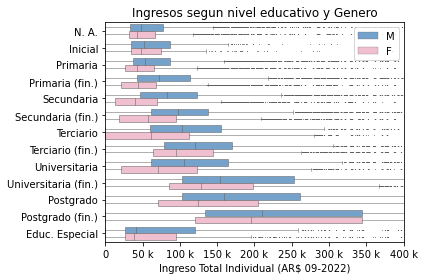

In [142]:
male_c = '#67A3D9'
feml_c = '#F8B7CD'

ax = sns.boxplot(y="P0910_label", x="P47T_persona", hue="P02",
                 data=data.sort_values('P0910'), linewidth=.5, palette = {1: male_c, 2: feml_c}, fliersize=.2, orient = 'h')

handles, _ = ax.get_legend_handles_labels() # Get the artists.
ax.legend(handles, ["M", "F"], loc="upper right")

ax.set_title('Ingresos segun nivel educativo y Genero')
ax.set_xlim(0, 4e5)

ax.set_xlabel('Ingreso Total Individual (AR$ '+mes+')')
ax.set_ylabel('')

ax.xaxis.set_major_formatter(EngFormatter())

plt.tight_layout(); plt.savefig('./../images/genero_niveduc.png');# j += 1
plt.show()

In [151]:
np.random.normal(1, 0.01)

1.002657727555681

In [153]:
data = df.loc[df.P03 >=24]
data['P47T_persona'] = data['P47T_persona'] + np.random.normal(0.01, 1, len(data))

q = 10
data['P47T_q'] = pd.qcut(data['P47T_persona'], q, labels=range(1, q + 1), duplicates = 'drop')

deciles = data.groupby(['P02', 'P47T_q']).size().unstack()
deciles = 100*deciles / deciles.sum()
deciles = deciles.T

<ipython-input-153-af276605f8e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P47T_persona'] = data['P47T_persona'] + np.random.normal(0.01, 1, len(data))
<ipython-input-153-af276605f8e4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P47T_q'] = pd.qcut(data['P47T_persona'], q, labels=range(1, q + 1), duplicates = 'drop')


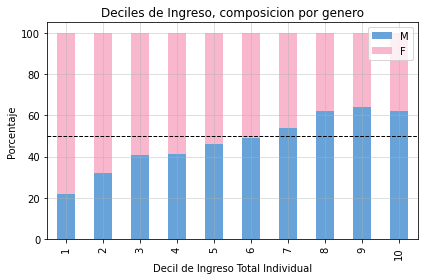

In [157]:
fig, ax = plt.subplots(1)

deciles.plot(kind = 'bar', color = [male_c, feml_c], ax = ax, stacked = True)

handles, _ = ax.get_legend_handles_labels() # Get the artists.
ax.legend(handles, ["M", "F"])

ax.set_title('Deciles de Ingreso, composicion por genero')

ax.set_xlabel('Decil de Ingreso Total Individual')
ax.set_ylabel('Porcentaje')
ax.axhline(50, c = 'k', lw = 1, linestyle = '--')

plt.tight_layout(); plt.savefig('./../images/deciles_genero.png');
ax.grid(alpha = .5)
plt.show()